# Homework

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')``` and do the following exercises **without for-loops**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt') 
years, krolik, pbICb, morkovka = data[:, 0], data[:, 1], data[:, 2], data[:, 3]


Plot the populations for the years in the period. Add legend and axis labels to the plot.

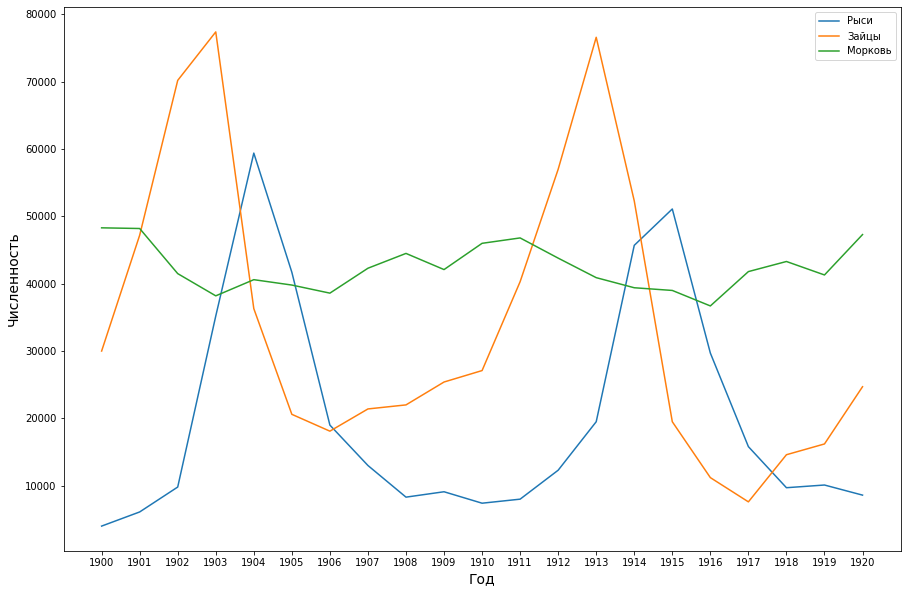

In [3]:
plt.figure(figsize = (15,10))
plt.plot(years, pbICb, label='Рыси')
plt.plot(years, krolik, label='Зайцы')
plt.plot(years, morkovka, label='Морковь')
plt.xlabel('Год', fontsize=14)
plt.xticks(years)
plt.ylabel('Численность', fontsize=14)
plt.legend()
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

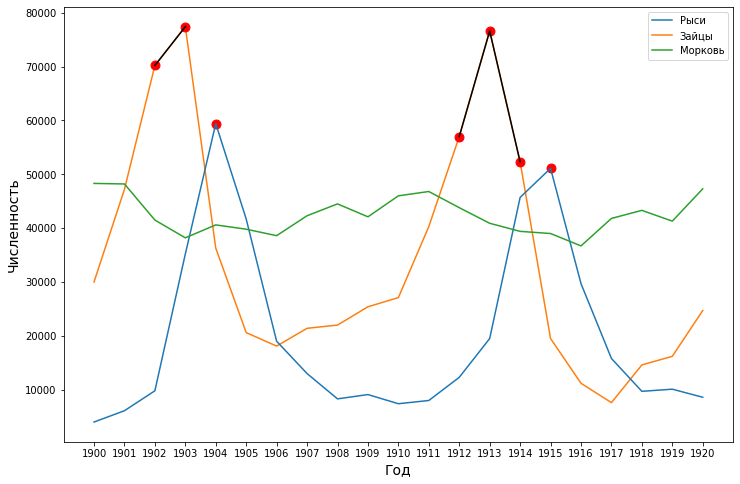

In [4]:
plt.figure(figsize = (12,8))
plt.scatter(years[pbICb >= 50000], pbICb[pbICb >= 50000], color = 'red', s = 80)
plt.scatter(years[krolik >= 50000], krolik[krolik >= 50000], color = 'red', s = 80)
plt.scatter(years[morkovka >= 50000], morkovka[morkovka >= 50000], color = 'red', s = 80)

#представляю как разбить года на подмассивы, отвечающие промежуткам с заданными условиями,
#но не знаю как без цикла (в общем случае) реализовать отрисовку графиков, отвечающих подмассивам
#иначе соединяются точки, которые "не рядом"

yearsk1 = np.array([1902, 1903])
yearsk2 = np.array([1912, 1913, 1914])

plt.plot(yearsk1, krolik[yearsk1 - 1900], color = 'black', zorder = 1)
plt.plot(yearsk2, krolik[yearsk2 - 1900], color = 'black', zorder = 2)

plt.plot(years, pbICb, label='Рыси')
plt.plot(years, krolik, label='Зайцы', zorder = -1)
plt.plot(years, morkovka, label='Морковь')
plt.xlabel('Год', fontsize=14)
plt.xticks(years)
plt.ylabel('Численность', fontsize=14)
plt.legend()
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

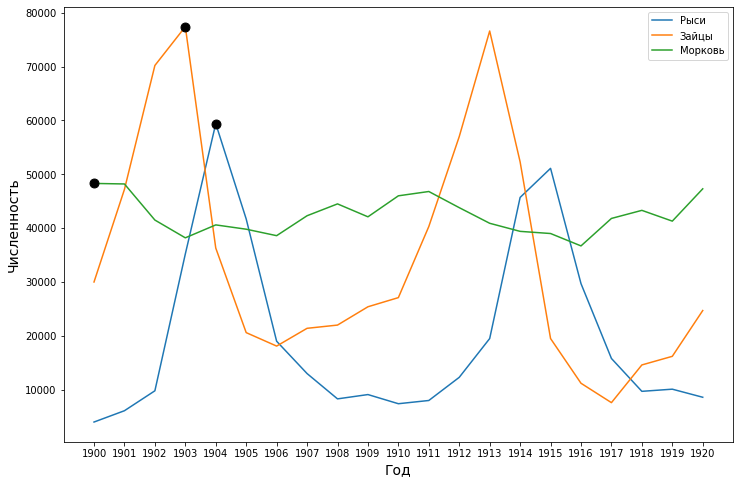

In [5]:
plt.figure(figsize = (12,8))
plt.scatter(years[pbICb == np.max(pbICb)], np.max(pbICb), color = 'black', s = 80)
plt.scatter(years[krolik == np.max(krolik)], np.max(krolik), color = 'black', s = 80)
plt.scatter(years[morkovka == np.max(morkovka)], np.max(morkovka), color = 'black', s = 80)

plt.plot(years, pbICb, label='Рыси', zorder = -1)
plt.plot(years, krolik, label='Зайцы', zorder = -1)
plt.plot(years, morkovka, label='Морковь', zorder = -1)
plt.xlabel('Год', fontsize=14)
plt.xticks(years)
plt.ylabel('Численность', fontsize=14)
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

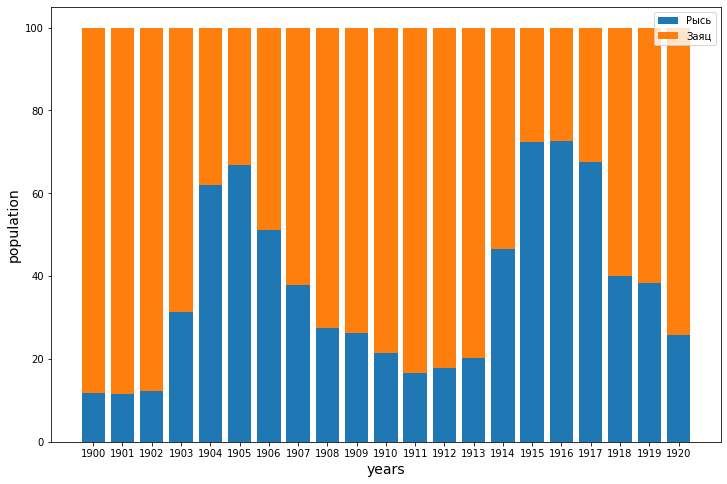

In [6]:
plt.figure(figsize=(12, 8))
plt.bar(years, np.divide(pbICb,(pbICb + krolik)) * 100, label = 'Рысь')
plt.bar(years, np.divide(krolik,(pbICb + krolik)) * 100, bottom = np.divide(pbICb,(pbICb + krolik)) * 100, label = 'Заяц')
plt.xlabel('years', fontsize=14)
plt.ylabel('population', fontsize=14)
plt.xticks(years)
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

20897.906458089667 16254.591536908763 3322.5062255844787


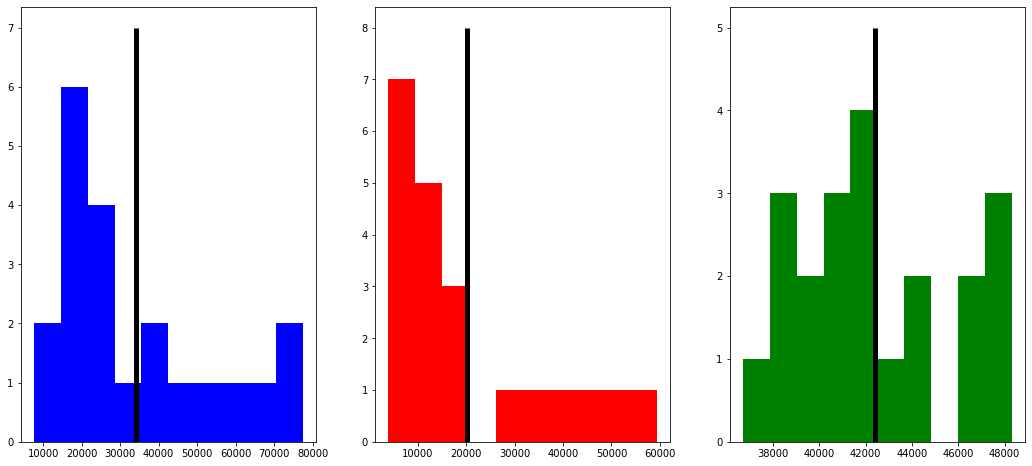

In [7]:
print(np.std(krolik), np.std(pbICb), np.std(morkovka))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 8))

ax1.hist(krolik, bins = 10, color = 'blue')
ax1.vlines(np.mean(krolik), 0, 7, linewidth = 5)

ax2.hist(pbICb, bins = 10, color = 'red')
ax2.vlines(np.mean(pbICb), 0, 8, linewidth = 5)

ax3.hist(morkovka, bins = 10, color = 'green')
ax3.vlines(np.mean(morkovka), 0, 5, linewidth = 5)

fig.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

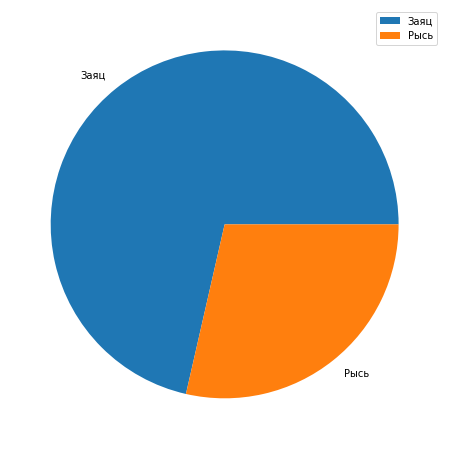

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


In [53]:
arr = np.array([None]*21)
mask = krolik >= pbICb
arr[mask] = 'H'
arr[np.logical_not(mask)] = 'L'

size = [np.count_nonzero(krolik >= pbICb), 21 - np.count_nonzero(krolik >= pbICb)]
labels = ['Заяц', 'Рысь']

plt.figure(figsize=(12, 8))
plt.pie(size, labels=labels)
plt.legend()
plt.show()

print(arr)

Plot the change in the hare population and the number of lynxes. Find the correlation coefficient.

0.07189206073535571


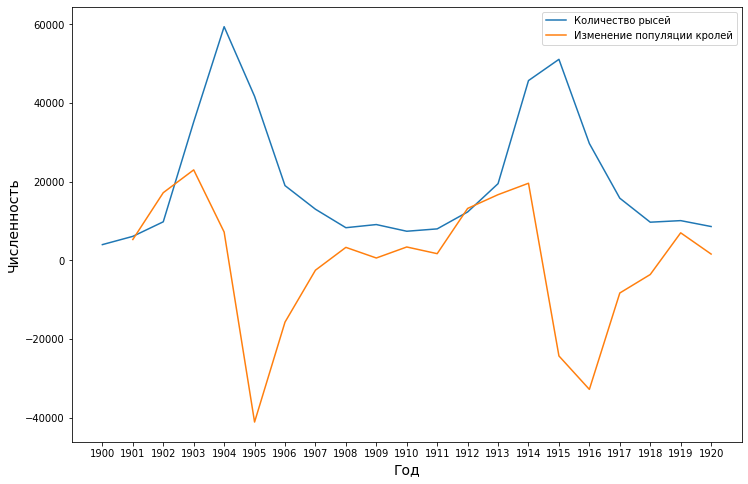

In [61]:
print(np.corrcoef(krolik, pbICb)[0][1])

plt.figure(figsize = (12,8))

plt.plot(years, pbICb, label='Количество рысей', zorder = -1)
plt.plot(years[:20] + 1, (krolik - np.roll(krolik,1))[:20], label='Изменение популяции кролей', zorder = -1)

plt.xlabel('Год', fontsize=14)
plt.xticks(years)
plt.ylabel('Численность', fontsize=14)
plt.legend()
plt.show()

Using a scatter plot, show the population of hares vs carrots and hares vs lynxes by year on two separate subplots (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

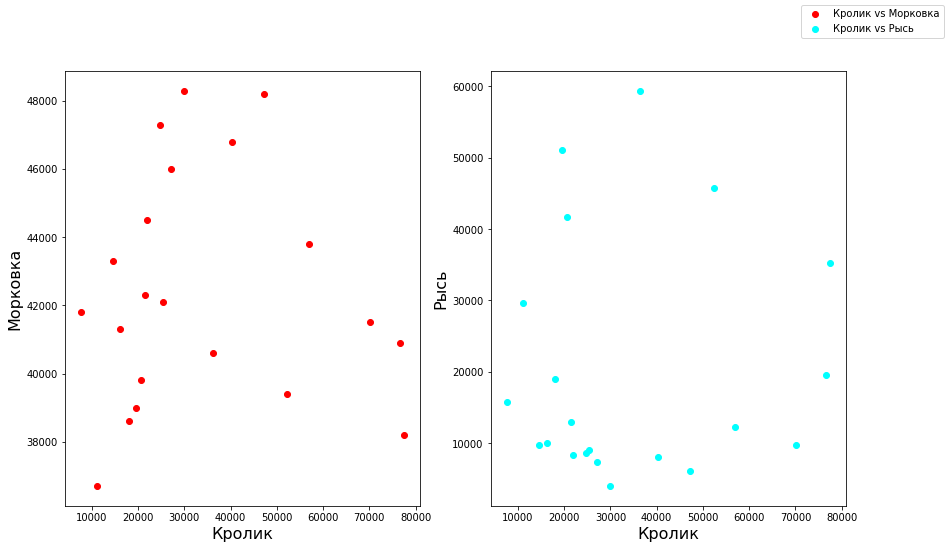

In [69]:
fig, axes = plt.subplots(1, 2, figsize = (14, 8))

axes[0].scatter(krolik,morkovka, label='Кролик vs Морковка', color = 'red')
axes[0].set_xlabel('Кролик', fontsize=16)
axes[0].set_ylabel('Морковка', fontsize=16)

axes[1].scatter(krolik, pbICb, label='Кролик vs Рысь', color = 'cyan')
axes[1].set_xlabel('Кролик', fontsize=16)
axes[1].set_ylabel('Рысь', fontsize=16)

fig.legend()
fig.show()

